# AdaBoost 분류 기본코드

Adaptive Boost

초기 모형을 약한 모형으로 설정하며 매 스탭마다 가중치를 이용하여 이전 모형의 약점을 보완하는 방식으로 새로운 모형을 순차적으로 학습하고 최종적으로 이들을 선형 결합하여 얻어진 모형을 생성하는 알고리즘

## #01. 준비작업

### [1] 패키지 가져오기


In [23]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## #02. 데이터 가져오기


In [24]:
origin = my_read_excel(
    "https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx",
    categories=["Outcome"],
    info=False,
)


상위 5개 행
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------|
|  0 |             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
|  1 |             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
|  2 |             8 |       183 |              64 |               0 |         0 |  23.3 |                      0.672 |    32 |         1 |
|  3 |             1 |        89 |              66 |              23 |        94 |  28.1 |                      0.167 |    21 |         0 |
|  4 |     

### [3] 전처리

`0` 값을 포함해서는 안되는 변수에 대해 평균으로 대체


In [25]:
# 정제 대상 필드명
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# 0값을 결측치로 대체후 평균으로 다시 치환
df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df2 = my_replace_missing_value(df)

my_pretty_table(df2.head())

+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------|
|  0 |             6 |       148 |              72 |              35 |   155.548 |  33.6 |                      0.627 |    50 |         1 |
|  1 |             1 |        85 |              66 |              29 |   155.548 |  26.6 |                      0.351 |    31 |         0 |
|  2 |             8 |       183 |              64 |         29.1534 |   155.548 |  23.3 |                      0.672 |    32 |         1 |
|  3 |             1 |        89 |              66 |              23 |        94 |  28.1 |                      0.167 |    21 |         0 |
|  4 |             0

### [4] 훈련/검증 데이터 분할 및 데이터 표준화


In [26]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, "Outcome", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## #03. AdaBoost

### [1] 부스팅에 사용할 최적의 알고리즘 선정


가지치기를 하지 않습니다.

+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                        |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| LogisticRegression     |                  0.311133 |           0.811688 |            0.736842 |         0.595745 |           0.0934579 |      0.906542 |   0.658824 | 0.875522 |
| SVC                    |                         0 |           0.772727 |            0.657895 |         0.531915 |            0.121495 |      0.878505 |   0.588235 | 0.855438 |
| KNeighborsClassifier   |                         0 |           0.766234 |            0.612245 |         0.638

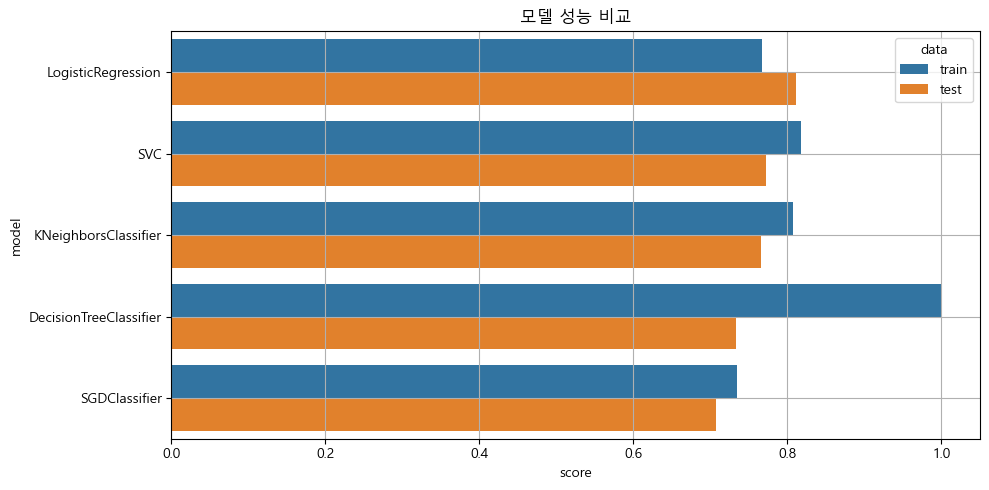



+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.270997 |     0.311133 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.767101 |     0.811688 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision)       |     0.724138 |     0.736842 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)          |     0.570136 |     0.595745 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout)       |     0.122137 |    0.0934579 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)             |     0.877863 |     0.906542 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score                |     0.637975 |     0.658824 | 정밀도와 재현율의 조화평균  

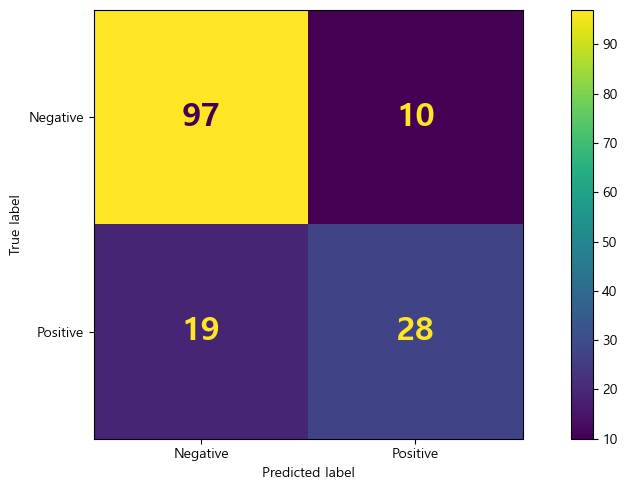

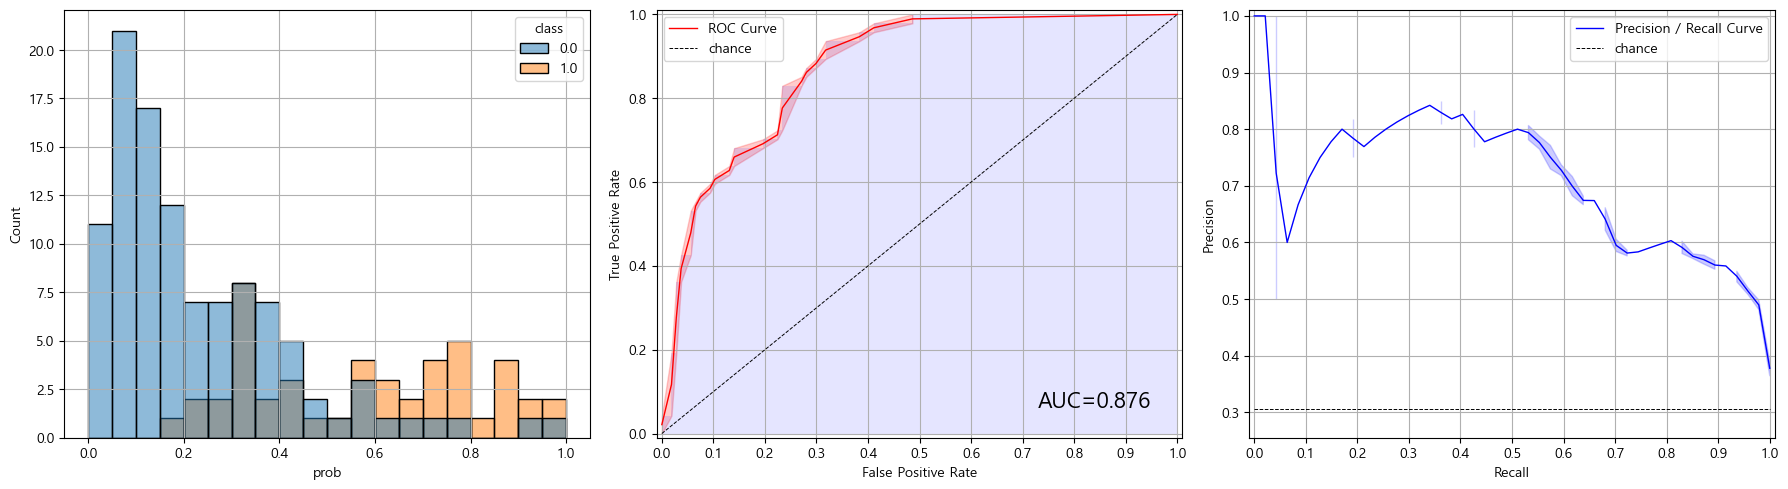

+----+---------+------------+--------------------------+--------------------+------------+---------+------------+---------+------------+
|    |   index | 종속변수   | 독립변수                 |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+---------+------------+--------------------------+--------------------+------------+---------+------------+---------+------------|
|  0 |       7 | Outcome    | Age                      |             0.2182 |      0.272 |  0.8032 |      0.422 | 1.64872 |     1.2439 |
|  1 |       3 | Outcome    | SkinThickness            |            -0.0328 |      0.259 | -0.1266 |      0.899 |  1.5504 |     0.9677 |
|  2 |       0 | Outcome    | Pregnancies              |             0.3301 |      0.274 |   1.203 |      0.229 | 1.53706 |     1.3911 |
|  3 |       5 | Outcome    | BMI                      |             0.6638 |      0.288 |  2.3051 |      0.021 | 1.52814 |     1.9421 |
|  4 |       1 | Outcome    | Glucose                  |       

LogisticRegression(n_jobs=-1, random_state=0, verbose=False)

In [27]:
estimator = my_classification(x_train, y_train, x_test, y_test, learning_curve=False)
best_estimator = estimator["best"]
best_estimator

### [2] AdaBoost 설정

| 하이퍼 파라미터    | 기본값                | 설명                                        | 추천사항                           |
|----------------|--------------------|-------------------------------------------|---------------------------------|
| `base_estimator` | `None` (DecisionTreeClassifier) | 사용할 약한 학습기. `None` 시 최대 깊이 1의 결정 트리 사용. | 복잡도에 맞게 모델 선택 가능.        |
| `n_estimators` | `50` | 약한 학습기의 최대 개수.                       | 과적합 주의하며 증가 가능.           |
| `learning_rate` | `1.0` | 학습률.                                     | 낮은 학습률과 더 많은 학습기의 조합 권장. |
| `algorithm` | `SAMME.R` | 부스팅 알고리즘. ( `SAMME` 또는 `SAMME.R` )          | `SAMME` 추천.                     |
| `random_state` | `None` | 난수 시드.                                   | 재현 가능한 결과를 위해 설정.         |

.

> `algorithm` 의 경우 현재 버전에서는 `SAMME.R` 이 기본값이지만 다음 버전에서 이 값이 삭제될 것이라는 경고 메시지가 표시되므로 `SAMME` 를 추천함


+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.760586 |     0.792208 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.688776 |     0.674419 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |      0.61086 |     0.617021 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.155216 |     0.130841 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.844784 |     0.869159 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.647482 |     0.644444 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.791855 |     0.836647 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--------------

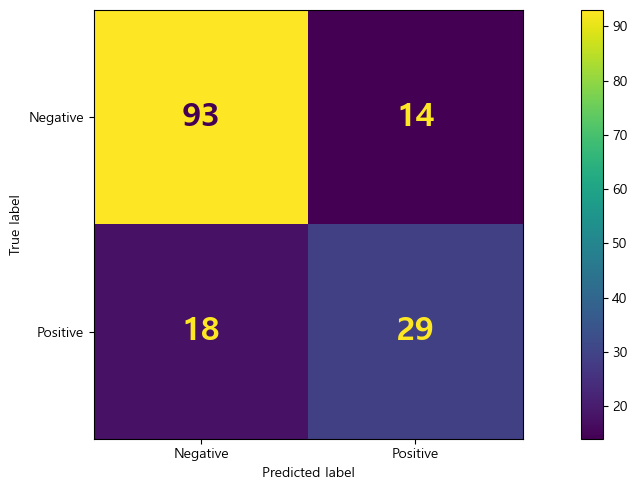

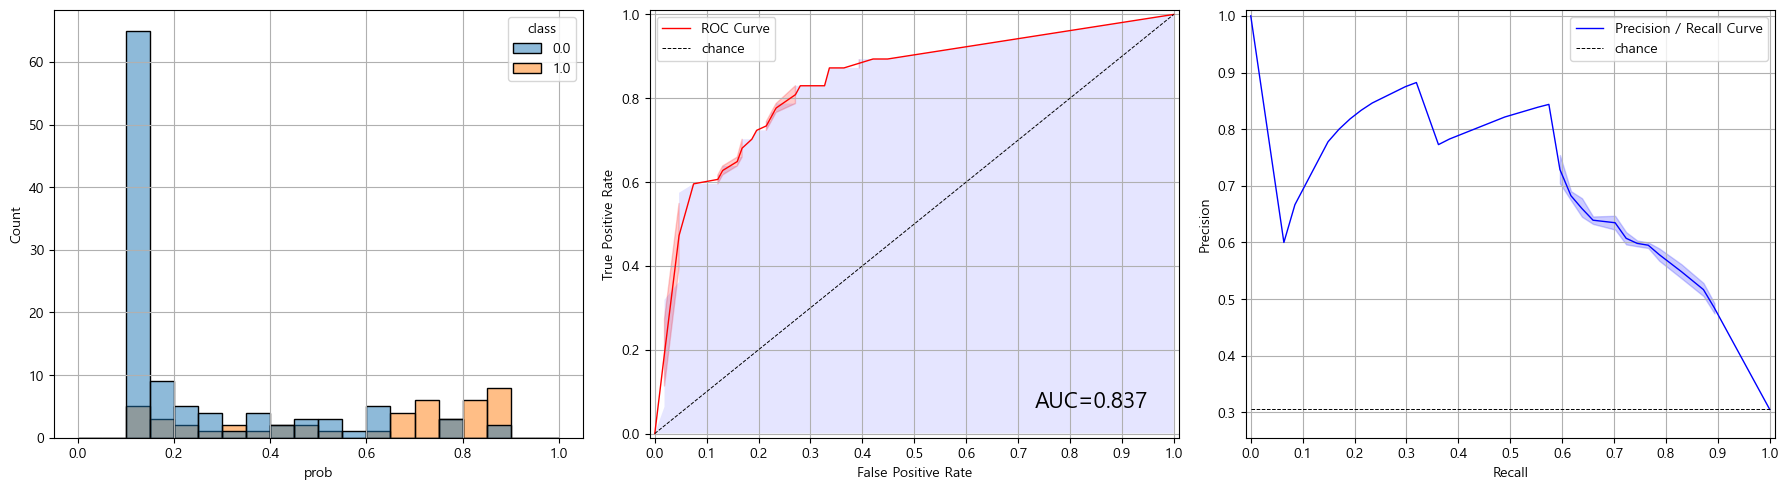

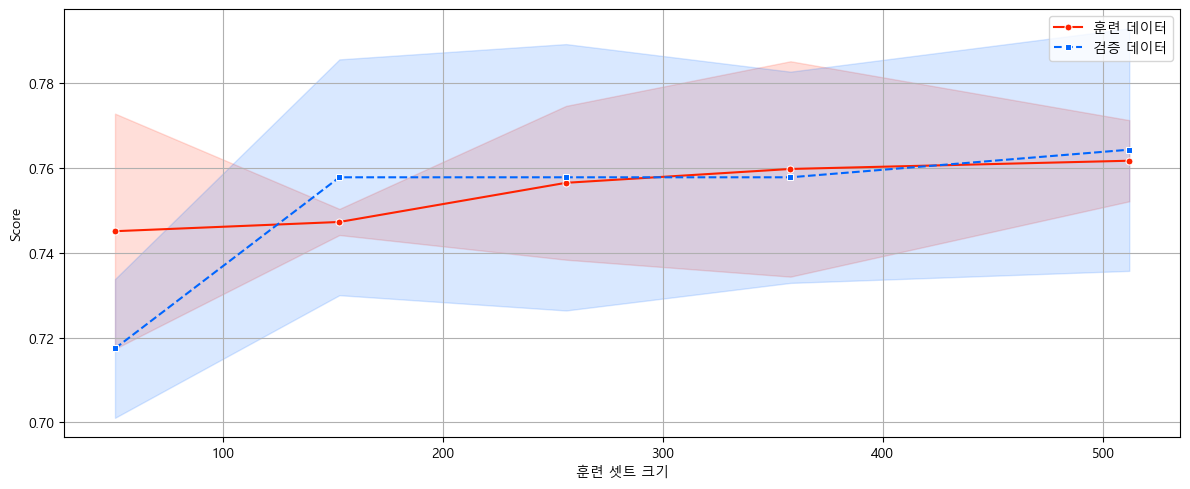

+----+------------+--------------------------+---------+
|    | 종속변수   | 독립변수                 |     VIF |
|----+------------+--------------------------+---------|
|  0 | Outcome    | Pregnancies              | 1.53706 |
|  1 | Outcome    | Glucose                  | 1.33393 |
|  2 | Outcome    | BloodPressure            | 1.25589 |
|  3 | Outcome    | SkinThickness            |  1.5504 |
|  4 | Outcome    | Insulin                  | 1.28711 |
|  5 | Outcome    | BMI                      | 1.52814 |
|  6 | Outcome    | DiabetesPedigreeFunction | 1.05376 |
|  7 | Outcome    | Age                      | 1.64872 |
+----+------------+--------------------------+---------+


In [28]:
ada = AdaBoostClassifier(
    estimator=best_estimator,
    n_estimators=100,
    learning_rate=0.1,
    algorithm="SAMME",
    random_state=get_random_state(),
)

ada.fit(x_train, y_train)

my_classification_result(ada, x_train, y_train, x_test, y_test)

my_classification_report(ada, x_train, y_train, x_test, y_test)

## #04. 모듈화 기능 확인

[교차검증 TOP5]
+----+----------------+-----------------+-------------------+
|    |   n_estimators |   learning_rate |   mean_test_score |
|----+----------------+-----------------+-------------------|
|  0 |             50 |               1 |          0.767133 |
|  1 |             20 |               1 |          0.765494 |
|  2 |             50 |             0.1 |          0.754098 |
|  3 |             20 |             0.1 |          0.729641 |
|  4 |            100 |            0.01 |          0.710103 |
+----+----------------+-----------------+-------------------+

[Best Params]
{'n_estimators': 50, 'learning_rate': 1}

+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.767101 |     0.811688 | 

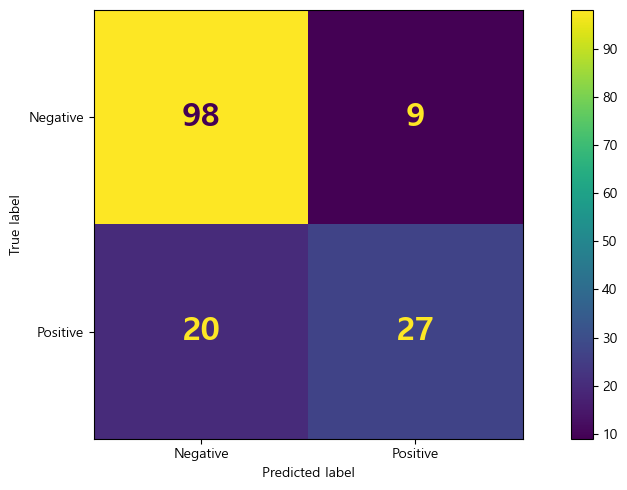

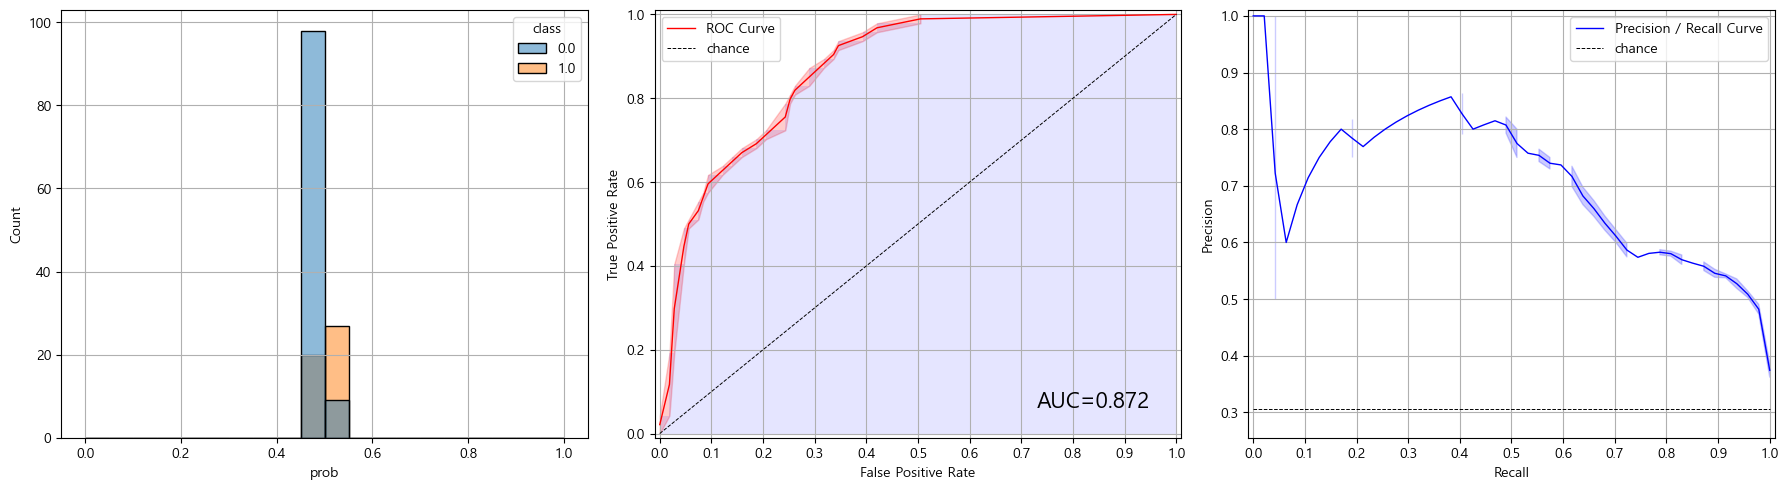

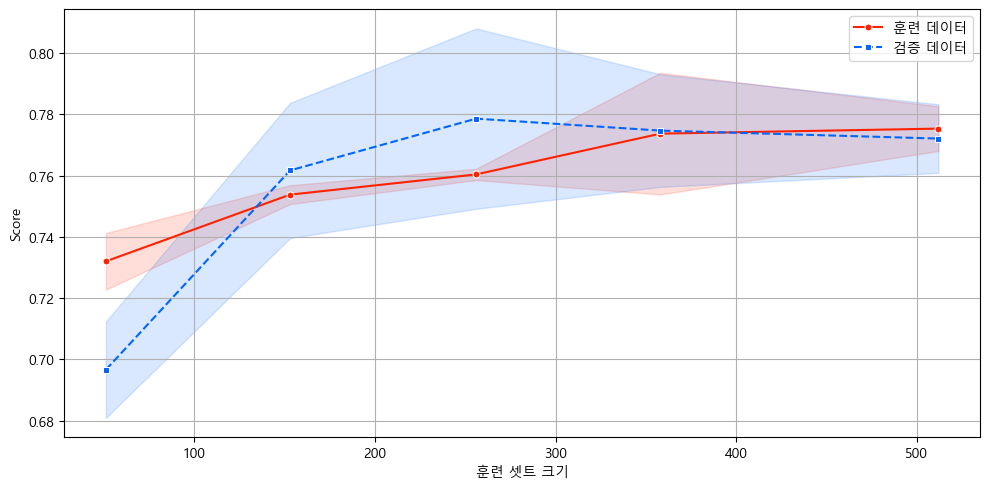

+----+---------+------------+--------------------------+---------+
|    |   index | 종속변수   | 독립변수                 |     VIF |
|----+---------+------------+--------------------------+---------|
|  0 |       7 | Outcome    | Age                      | 1.64872 |
|  1 |       3 | Outcome    | SkinThickness            |  1.5504 |
|  2 |       0 | Outcome    | Pregnancies              | 1.53706 |
|  3 |       5 | Outcome    | BMI                      | 1.52814 |
|  4 |       1 | Outcome    | Glucose                  | 1.33393 |
|  5 |       4 | Outcome    | Insulin                  | 1.28711 |
|  6 |       2 | Outcome    | BloodPressure            | 1.25589 |
|  7 |       6 | Outcome    | DiabetesPedigreeFunction | 1.05376 |
+----+---------+------------+--------------------------+---------+


AdaBoostClassifier(estimator=LogisticRegression(n_jobs=-1, random_state=0,
                                                verbose=False),
                   learning_rate=1, random_state=0)

In [29]:
# case1 - 최적 모형에 대한 객체를 전달하는 경우
my_ada_classification(estimator=best_estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

# case2 - 최적 모형에 대한 클래스를 전달하는 경우
# my_ada_classification(estimator=DecisionTreeRegressor, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

# case3 - 최적모형 전달 하지 않음 (모듈 내부에서 최적 모형 탐색 후 수행함)
# my_ada_classification(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)